resampling warmup


Do your work in whatever format you feel most comfortable with (notebook, repl, etc). Get the data from the_data.csv into a data frame.
Make sure timestamp is a datetime type and set it as the index.
Answer the questions below:
By Group

What is the maximum x value for group B?
What is the average x value for group A?
What is the minimum x value for group C?
Which group has the highest sum of x values?
Time Aggregates

What is the least frequent y value for 2018-04-30?
What is the sum of the x values for 2018-05-01?
What is the average x value for each day? The median?
What is the most frequent y value for each day?
Visualization

Visualize the minimum x value of each group with a bar chart.
Visualize x over time.
Visualize x over time by y value.


In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from datetime import datetime
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
colnames=['timestamp', 'x', 'y']
df = pd.read_csv('the_data.csv',          
                 engine='python',
                 parse_dates=['timestamp'],
                 index_col='timestamp',
                 skiprows=[0],
                 names=colnames,
#                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
#                usecols=[0, 1, 2]
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-04-30 00:00:00 to 2018-05-01 23:00:00
Data columns (total 2 columns):
x    48 non-null float64
y    48 non-null object
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df.head()

,x,y
timestamp,,
2018-04-30 00:00:00,1.84,A
2018-04-30 01:00:00,1.47,C
2018-04-30 02:00:00,0.20,B
2018-04-30 03:00:00,0.17,C
2018-04-30 04:00:00,2.06,C


In [5]:
# already done by the read_csv
# df.timestamp = pd.to_datetime(df.timestamp)

In [6]:
df.groupby(['y']).max()

,x
y,
A,1.84
B,1.91
C,2.06


In [7]:
df[df.y == 'B'].x.max()

1.91

In [8]:
df.groupby('y').max()

,x
y,
A,1.84
B,1.91
C,2.06


In [9]:
df.groupby('y').describe()

x                                                      
  count      mean       std   min     25%   50%     75%   max
y                                                            
A  18.0 -0.110556  0.925784 -1.30 -0.9075 -0.08  0.2575  1.84
B  13.0 -0.053846  1.328731 -2.05 -0.8100  0.20  0.7400  1.91
C  17.0  0.232353  1.108594 -1.83 -0.1300  0.28  0.9800  2.06

In [10]:
df.groupby('y').agg(['max','mean','min','sum'])

x                      
    max      mean   min   sum
y                            
A  1.84 -0.110556 -1.30 -1.99
B  1.91 -0.053846 -2.05 -0.70
C  2.06  0.232353 -1.83  3.95

In [11]:
df.resample('6H')

DatetimeIndexResampler [freq=<6 * Hours>, axis=0, closed=left, label=left, convention=start, base=0]

In [12]:
df.resample('D').sum()

,x
timestamp,
2018-04-30,5.28
2018-05-01,-4.02


In [13]:
df.resample('D').agg(['sum','mean','median'])

x               
             sum    mean median
timestamp                      
2018-04-30  5.28  0.2200  0.175
2018-05-01 -4.02 -0.1675  0.220

In [14]:
df.groupby([df.index.date, 'y']).count()

x
           y    
2018-04-30 A  10
           B   7
           C   7
2018-05-01 A   8
           B   6
           C  10

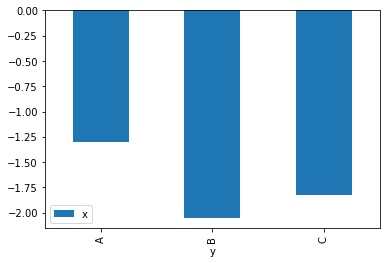

In [15]:
df.groupby('y').min().plot.bar()